In [1]:
# read the iris data into a DataFrame
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [44]:
iris.head()

# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [45]:
# create a custom colormap
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'], 'indexed')

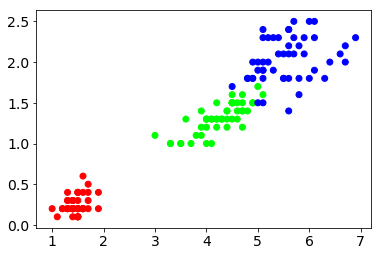

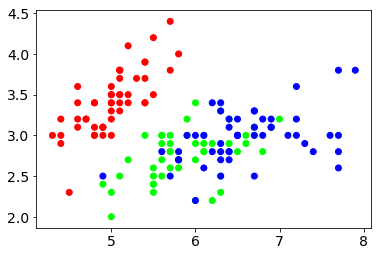

In [42]:
# map each iris species to a number
# let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column caled 'species_num'


iris['species_num'] = [0 if x =='Iris-setosa' else 1 if x == 'Iris-versicolor' else 2 if x == 'Iris-virginica' else null for x in iris.species]

# check it out
# create a scatter plot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
plt.scatter(iris.petal_length, iris.petal_width, c=iris.species_num, cmap=cmap_bold)
plt.show()

# create a scatter plot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES
plt.scatter(iris.sepal_length, iris.sepal_width, c=iris.species_num, cmap=cmap_bold)
plt.show()


## KNN Modeling


### Store feature matrix in "X"


In [48]:
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]

### Store response vector in "y"


In [49]:
y = iris.species

### Make use of train, test, split

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

### Import KNN from SKLearn, instatiate a model with one neighbor


In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### Check the accuracy


In [61]:
from sklearn import metrics

y_pred_class = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

0.973684210526


### Create a model with 5 neighbors. Did it improve?


In [105]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

# Nope, it looks like it got worse

0.947368421053


### Create a looped function that will check all levels of various neighbors. Implement it.

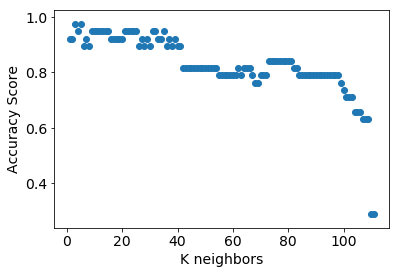

'optimal k = 5 with accuracy score = 0.973684210526'

In [103]:
def tts_find_knn(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    n = len(y_train)
    ks = []
    scores = []
    ideal_k = 1
    for k in range(1,n):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred_class = knn.predict(X_test)
        score = metrics.accuracy_score(y_test, y_pred_class)
        ks.append(k)
        scores.append(score)
        max_score = max(scores)
        if score >= max_score: 
            ideal_k = k        
    plt.scatter(ks, scores)
    plt.xlabel('K neighbors')
    plt.ylabel('Accuracy Score')
    plt.show()
    return 'optimal k = ' + str(ideal_k) + ' with accuracy score = ' + str(max_score)
    
tts_find_knn(X,y)

### Bonus: according to SKLearn documentation, what is 'knn.predict_proba(X_new)' going to do?


This function is going to take a value outside of our training data and predict the Y